In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
import pandas as pn
import numpy as np
import math
import seaborn
import random

In [26]:
def make_rep():
    df = pn.DataFrame()
    df['Pieza'] = range(1, 1501)
    df['Tiempo entre llegadas'] = [5*random.random() for x in range(1500)] 
    df['Tiempo de llegada'] = [sum(df['Tiempo entre llegadas'][:i+1]) for i in range(len(df['Tiempo entre llegadas']))]
    df['Tiempo de inspeccion'] = [np.random.normal(4.0, 0.5) for x in range(1500)]

    f = list()
    h = list()

    s = 0
    for x in range(1500):
        f.append(max(df['Tiempo de llegada'][x], s))
        h.append(df['Tiempo de llegada'][x] + df['Tiempo de inspeccion'][x])
        s = h[x]

    df['Inicio de inspeccion'] = f
    df['Fin de la inspeccion'] = h
    df['Tiempo en inspeccion'] = df['Fin de la inspeccion'] - df['Tiempo de llegada']
    df['Tiempo en espera'] = df['Inicio de inspeccion'] - df['Tiempo de llegada']
    df['Tiempo promedio en inspeccion'] = [sum(df['Tiempo en inspeccion'][:i+1])/(i+1) for i in range(len(df['Tiempo en inspeccion']))]
    
    return df

In [27]:
df1 = make_rep()
df1[['Pieza', 'Tiempo entre llegadas', 'Tiempo de llegada', 'Inicio de inspeccion', 'Tiempo de inspeccion', 'Fin de la inspeccion', 'Tiempo en inspeccion', 'Tiempo en espera', 'Tiempo promedio en inspeccion']]

,Pieza,Tiempo entre llegadas,Tiempo de llegada,Inicio de inspeccion,Tiempo de inspeccion,Fin de la inspeccion,Tiempo en inspeccion,Tiempo en espera,Tiempo promedio en inspeccion
0,1,1.575287,1.575287,1.575287,4.453652,6.028940,4.453652,0.000000,4.453652
1,2,3.525130,5.100417,6.028940,3.694112,8.794529,3.694112,0.928522,4.073882
2,3,3.766257,8.866674,8.866674,3.861092,12.727766,3.861092,0.000000,4.002952
3,4,3.170422,12.037096,12.727766,3.433731,15.470827,3.433731,0.690670,3.860647
4,5,1.985668,14.022764,15.470827,3.170445,17.193209,3.170445,1.448063,3.722607
5,6,2.292367,16.315131,17.193209,3.934874,20.250005,3.934874,0.878079,3.757984
6,7,4.202728,20.517859,20.517859,3.827397,24.345256,3.827397,0.000000,3.767901
7,8,0.155261,20.673120,24.345256,4.119496,24.792616,4.119496,3.672136,3.811850
8,9,2.676762,23.349882,24.792616,3.464144,26.814026,3.464144,1.442734,3.773216
9,10,3.168048,26.517929,26.814026,4.209445,30.727374,4.209445,0.296096,3.816839


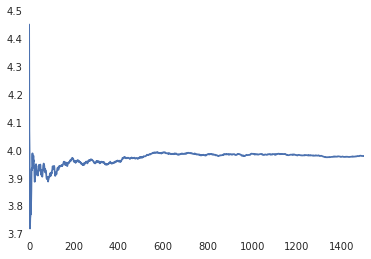

In [28]:
df1['Tiempo promedio en inspeccion'].plot()

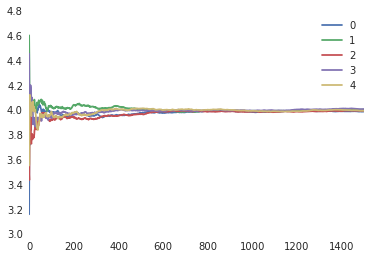

In [29]:
dfs = [make_rep() for _ in range(5)]
df = pn.DataFrame()
for i, d in enumerate(dfs):
    df[i] = d['Tiempo promedio en inspeccion']

df.plot()